## Challenge code
 
 You must complete the `time` function that will take the hour and minutes as an argument and generate the two-qubit state associated to the indicated time.

 ![img](images/clock1.jpeg)
 ![img](images/clock2.jpeg)
 ![img](images/clock3.jpeg)
 
 ### Input
 
 The input will be two integers. The one corresponding to the hours will take values from 1 to 12 and the one corresponding to the minutes will range from 0 to 59.
 
 ### Output
 
 The output will be the vector of probabilities of the two-qubit state, measured in the computational basis. You are only asked to complete the gates, we'll handle the rest. Good luck!
 ### Imports
 The cell below specifies the libraries you should use in this challenge. Run the cell to import the libraries. ***Do not modify the cell.***

In [2]:
import json
import pennylane as qml
from pennylane import numpy as np

### Code
 Complete the code below. Note that during QHack, some sections were not editable. We've marked those sections accordingly here, but you can still edit them if you wish.

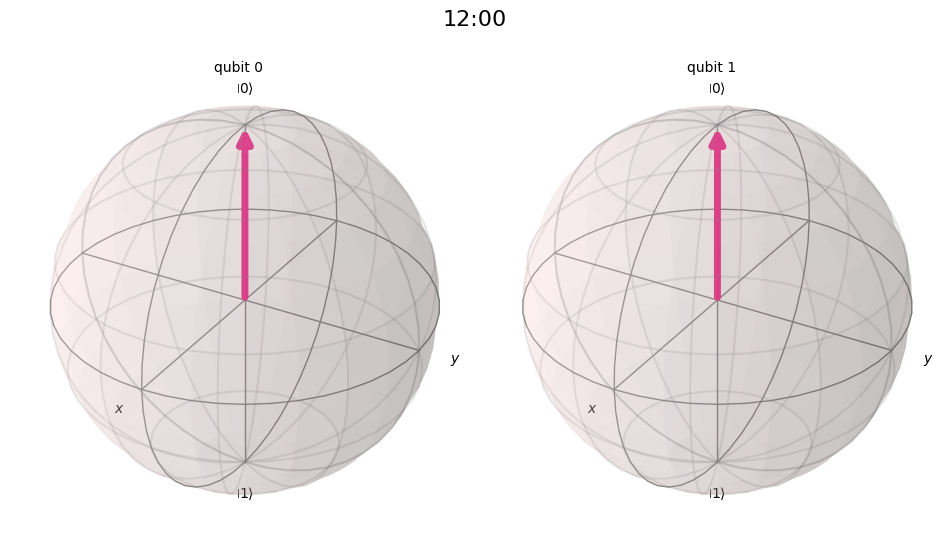

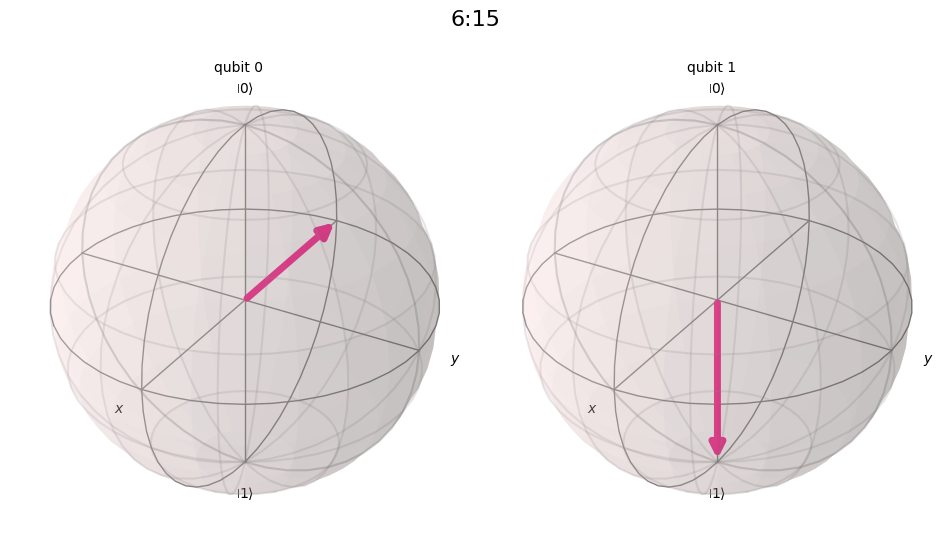

In [11]:
dev = qml.device("default.qubit", wires=["hour", "minute"])

@qml.qnode(dev)
def time(hour, minute):
    theta_hours = hour * (2*np.pi / 12)
    theta_minutes = minute * (2*np.pi / 60)
    qml.RY(-theta_hours, wires="hour")
    qml.RY(-theta_minutes, wires="minute")
    return qml.state()

from qiskit.quantum_info import Statevector
display(Statevector(time(12, 0)).draw(output='bloch', title="12:00"))
display(Statevector(time(6, 15)).draw(output='bloch', title="6:15"))

In [3]:
# Uneditable section #
dev = qml.device("default.qubit", wires=["hour", "minute"])
# End of uneditable section #

@qml.qnode(dev)
def time(hour, minute):
    """Generates the quantum state associated with the time passed as argument.

    Args:
        hour (int): Hour associated with the requested time
        minute (int): Minutes associated with the requested time

    Returns:
        (numpy.tensor): Probabilities associated with the state created.
    """
    # Put your code here #
    theta_hours = hour * (2*np.pi / 12)
    theta_minutes = minute * (2*np.pi / 60)
    qml.RY(-theta_hours, wires="hour")
    qml.RY(-theta_minutes, wires="minute")
    return qml.probs(wires=["hour", "minute"])

These functions are responsible for testing the solution. You will need to run the cell below. ***Do not modify the cell.***

In [4]:
def run(test_case_input: str) -> str:
    hour, minute = json.loads(test_case_input)
    state = [float(x) for x in time(hour, minute)]
    return str(state)

def check(solution_output, expected_output: str) -> None:

    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)

    assert np.allclose(
        solution_output, expected_output, atol=0.1
    ), "The solution does not seem to be correct."

### Test cases
 Running the cell below will load the test cases. ***Do not modify the cell***.
 - input: [12, 0]
 	+ expected output: [1.0, 0.0, 0.0, 0.0]
 - input: [1, 30]
 	+ expected output: [0.0, 0.85355339, 0.0, 1.46446609e-01]
 - input: [2, 45]
 	+ expected output: [0.28263155, 0.28263155, 0.21736845, 0.21736845]
 - input: [10, 25]
 	+ expected output: [0.05612163, 0.78167347, 0.01086567, 0.15133923]

In [5]:
test_cases = [['[12, 0]', '[1.0, 0.0, 0.0, 0.0]'], ['[1, 30]', '[0.0, 0.85355339, 0.0, 1.46446609e-01]'], ['[2, 45]', '[0.28263155, 0.28263155, 0.21736845, 0.21736845]'], ['[10, 25]', '[0.05612163, 0.78167347, 0.01086567, 0.15133923]']]

### Solution testing
 Once you have run every cell above, including the one with your code, the cell below will test your solution. Run the cell. If you are correct for all of the test cases, it means your solutions is correct. Otherwise, you need to double check your work. ***Do not modify the cell below.***

In [6]:
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[12, 0]'...
Correct!
Running test case 1 with input '[1, 30]'...
Correct!
Running test case 2 with input '[2, 45]'...
Correct!
Running test case 3 with input '[10, 25]'...
Correct!
